In [1]:
import pickle
import os
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
from plot_utils import *

In [3]:
from importlib import reload

import plot_utils
reload(plot_utils)
from plot_utils import *

In [4]:
from data_collapse import *

In [5]:
from importlib import reload

import data_collapse
reload(data_collapse)
from data_collapse import *

## xj={1/3,2/3}

In [34]:
params_list=[
# ({'xj':'1-3,2-3','en':2000,'anc':False},{'p_ctrl':np.linspace(0,1.0,101),'p_proj':np.linspace(0,0.6,61),'s':np.arange(1),'L':np.array([8,12,16])}),
# ({'xj':'1-3,2-3','en':1000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([20])}),
# ({'xj':'1-3,2-3','en':60,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(32),'L':np.array([24])}),
({'xj':'1-3,2-3','en':2000,'anc':False,'p_proj':0},{'p_ctrl':np.arange(0.65,1.01,0.05),'s':np.arange(1),'L':np.array([8,12,16])}),
({'xj':'1-3,2-3','en':1000,'anc':False,'p_proj':0},{'p_ctrl':np.arange(0.65,1.01,0.05),'s':np.arange(2),'L':np.array([20])}),
({'xj':'1-3,2-3','en':500,'anc':False,'p_proj':0},{'p_ctrl':np.arange(0.65,1.01,0.05),'s':np.arange(4),'L':np.array([20])}),
({'xj':'1-3,2-3','en':60,'anc':False,'p_proj':0},{'p_ctrl':np.arange(0.65,1.01,0.05),'s':np.arange(32),'L':np.array([24])})
]
for fixed_params,vary_params in params_list:
    data_1_3_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}.pickle',
        # fn_dir_template='Data/Metrics/{xj}/',
        fn_dir_template='/mnt/e/Control_Transition/Metrics/{xj}/',
        input_params_template='{s} {p_ctrl:.2f} {p_proj:.2f} {L:d} {L+2:d} {xj.replace("-","/"):s} {en:d} {"-ancilla"*anc}',
        load_data=load_pickle,
        filename='params_AFM.txt',
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )


# df_1_3=convert_pd(data_1_3_dict,names=['Metrics','L','p_ctrl','p_proj'])


generate_params: 100%|██████████| 256/256 [00:00<00:00, 10816.81it/s]


In [34]:
params_list=[
# ({'xj':'1-3,2-3','en':2000,'anc':False},{'p_ctrl':np.linspace(0,1.0,101),'p_proj':np.linspace(0,0.6,61),'s':np.arange(1),'L':np.array([8,12,16])}),
# ({'xj':'1-3,2-3','en':1000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([20])}),
# ({'xj':'1-3,2-3','en':60,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(32),'L':np.array([24])}),
({'xj':'1-3,2-3','en':2000,'anc':False},{'p_ctrl':[0.39],'p_proj':np.linspace(0,0.6,61),'s':np.arange(1),'L':np.array([8,12,16])}),
({'xj':'1-3,2-3','en':1000,'anc':False},{'p_ctrl':[0.39],'p_proj':np.linspace(0,0.6,61),'s':np.arange(2),'L':np.array([20])}),
({'xj':'1-3,2-3','en':60,'anc':False},{'p_ctrl':[0.39],'p_proj':np.linspace(0,0.6,61),'s':np.arange(32),'L':np.array([24])}),
# ({'xj':'1-3,2-3','en':2000,'anc':False,'p_proj':0},{'p_ctrl':np.linspace(0,1.0,101),'s':np.arange(2),'L':np.array([8,12,16])}),
# ({'xj':'1-3,2-3','en':1000,'anc':False,'p_proj':0},{'p_ctrl':np.linspace(0,1.0,101),'s':np.arange(2),'L':np.array([20])}),
# ({'xj':'1-3,2-3','en':500,'anc':False,'p_proj':0},{'p_ctrl':np.linspace(0,1.0,101),'s':np.arange(4),'L':np.array([20])}),
# ({'xj':'1-3,2-3','en':60,'anc':False,'p_proj':0},{'p_ctrl':np.linspace(0,1.0,101),'s':np.arange(32),'L':np.array([24])})
]
for fixed_params,vary_params in params_list:
    fixed_params['L2']=vary_params['L']+2
    data_1_3_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L2},2)_xj({xj})_seed{s}_64.pickle',
        # fn_dir_template='Data/Metrics/{xj}/',
        fn_dir_template='/mnt/e/Control_Transition/Metrics/{xj}/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        data_dict_file='xj({xj}){"_anc"*anc}.pickle', 
    )


df_1_3=convert_pd(data_1_3_dict,names=['Metrics','L','p_ctrl','p_proj'])


Loading data_dict /mnt/e/Control_Transition/Metrics/1-3,2-3/xj(1-3,2-3).pickle


generate_params: 100%|██████████| 183/183 [00:00<00:00, 45945.03it/s]


Loading data_dict /mnt/e/Control_Transition/Metrics/1-3,2-3/xj(1-3,2-3).pickle


generate_params: 100%|██████████| 122/122 [00:00<00:00, 53733.60it/s]


Loading data_dict /mnt/e/Control_Transition/Metrics/1-3,2-3/xj(1-3,2-3).pickle


generate_params: 100%|██████████| 1952/1952 [00:00<00:00, 45074.72it/s]


In [7]:
fns=set(os.listdir('Data/Metrics/1-3,2-3'))

In [7]:
len(data_1_3_dict['fn'])

2251

In [9]:
[fn for fn in fns-data_1_3_dict['fn'] if 'L(10' not in fn]

['xj(1-3,2-3).pickle']

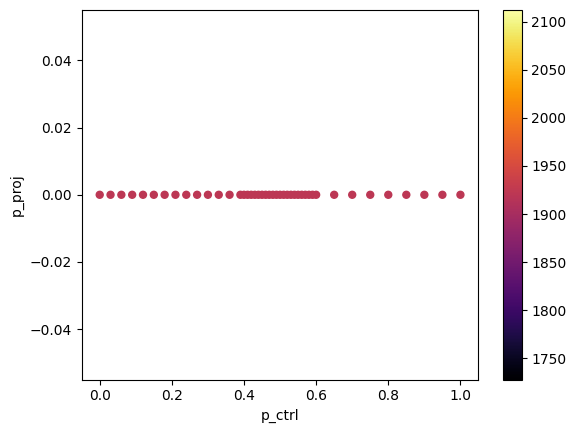

In [36]:
visualize_dataset(df_1_3,params={'Metrics':'O','L':24},xlabel='p_ctrl',ylabel='p_proj')

# Plot

## O

### O mean

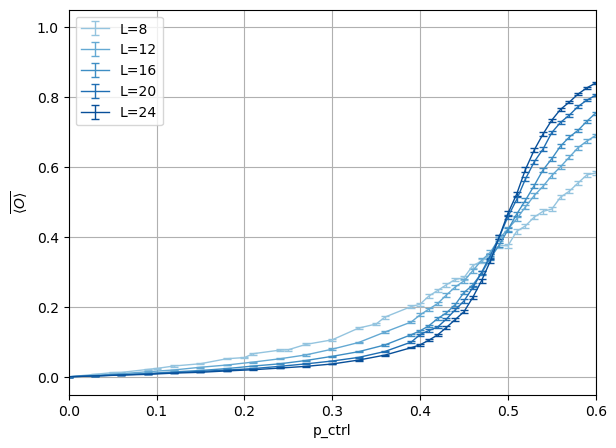

In [48]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0},
yscale=None,
errorbar=True,
filename=None,
)

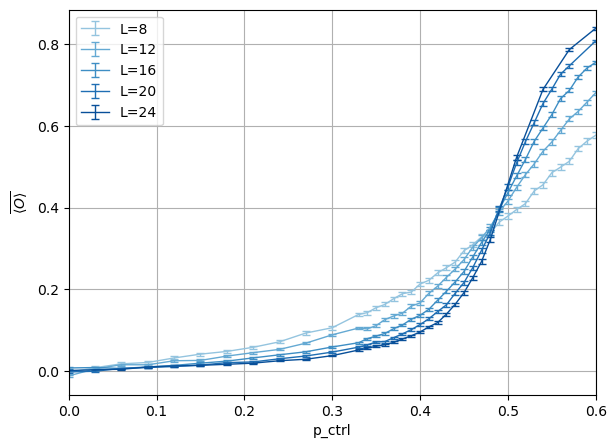

In [49]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='O',
x_name='p_ctrl',
fixed_params={'p_proj':0.3},
yscale=None,
errorbar=True,
filename=None,
)

## TMI

### TMI mean

## along p_ctrl

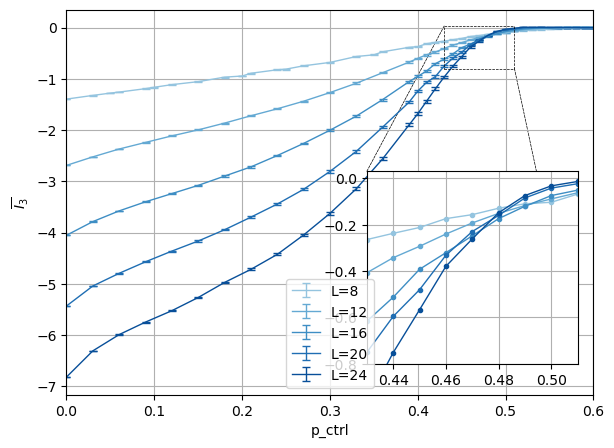

In [50]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=True,
xlim2=[0.43,0.51],
ylim2=[-0.8,0.03],
ax_inset_pos2=[.57,.08,.4,.5],
metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.0},
yscale=None,
errorbar=True,
filename=None,
)

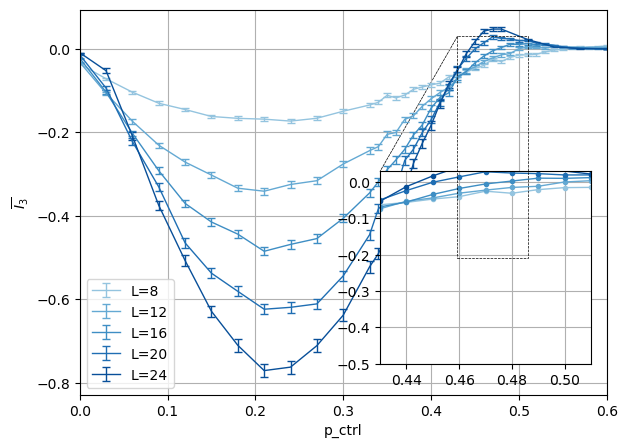

In [51]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=True,
xlim2=[0.43,0.51],
ylim2=[-0.5,0.03],
ax_inset_pos2=[.57,.08,.4,.5],
metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.3},
yscale=None,
errorbar=True,
filename=None,
)

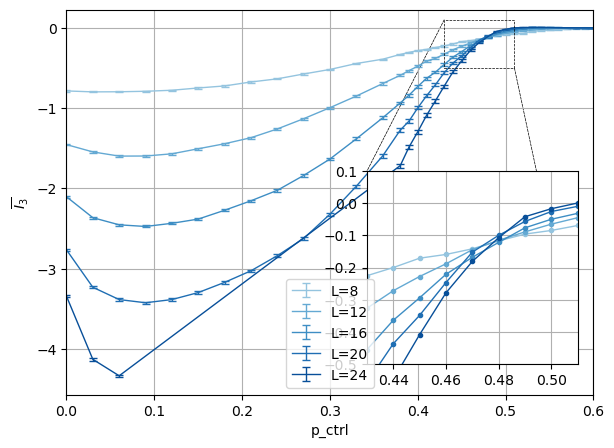

In [33]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=True,
xlim2=[0.43,0.51],
ylim2=[-0.5,0.1],
ax_inset_pos2=[.57,.08,.4,.5],
metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.06},
yscale=None,
errorbar=True,
filename=None,
)

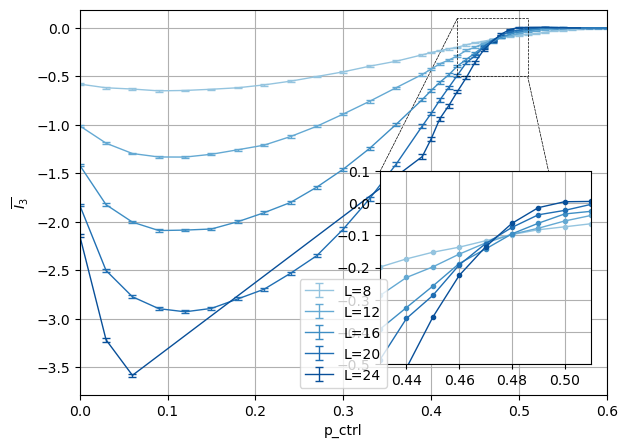

In [32]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=True,
xlim2=[0.43,0.51],
ylim2=[-0.5,0.1],
ax_inset_pos2=[.57,.08,.4,.5],
metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.09},
yscale=None,
errorbar=True,
filename=None,
)

## along p_proj

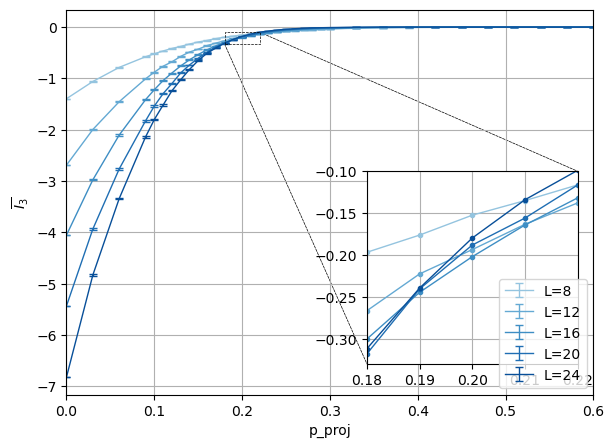

In [46]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=True,
xlim1=[.18,.22],
ylim1=[-.33,-0.1],
ax_inset_pos1=[.57,.08,.4,.5],inset2=False,
xlim2=[0.43,0.51],
ylim2=[-0.5,0.1],
ax_inset_pos2=[.57,.08,.4,.5],
metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.0},
yscale=None,
errorbar=True,
filename=None,
)

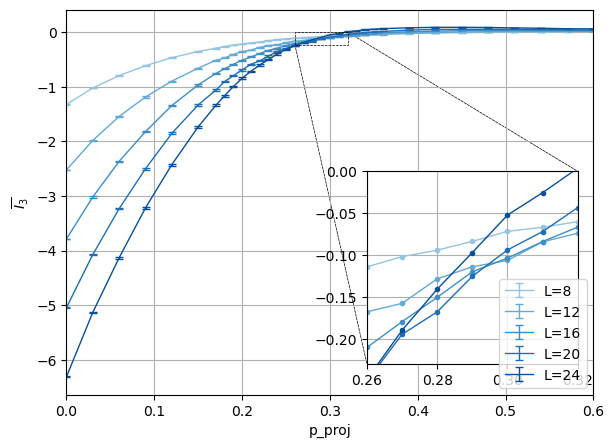

In [71]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=True,
xlim1=[.26,.32],
ylim1=[-.23,0.],
ax_inset_pos1=[.57,.08,.4,.5],inset2=False,
xlim2=[0.43,0.51],
ylim2=[-0.5,0.1],
ax_inset_pos2=[.57,.08,.4,.5],
metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.03},
yscale=None,
errorbar=True,
filename=None,
)

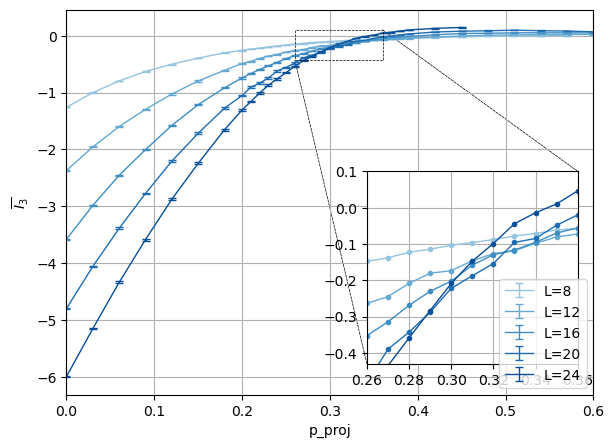

In [76]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=True,
xlim1=[.26,.36],
ylim1=[-.43,0.1],
ax_inset_pos1=[.57,.08,.4,.5],inset2=False,
xlim2=[0.43,0.51],
ylim2=[-0.5,0.1],
ax_inset_pos2=[.57,.08,.4,.5],
metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.06},
yscale=None,
errorbar=True,
filename=None,
)

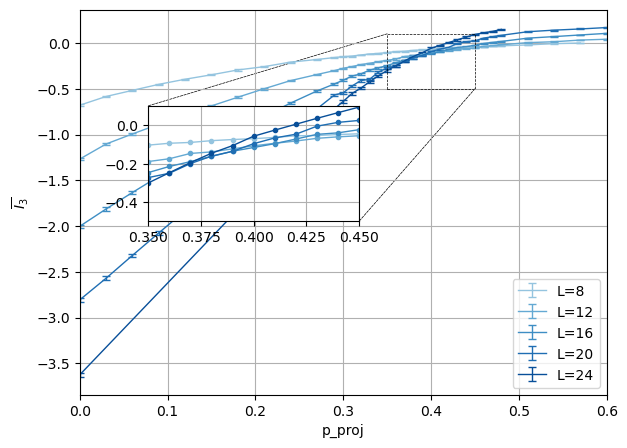

In [119]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=True,
xlim1=[.35,.45],
ylim1=[-.5,0.1],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.3},
yscale=None,
errorbar=True,
filename=None,
)

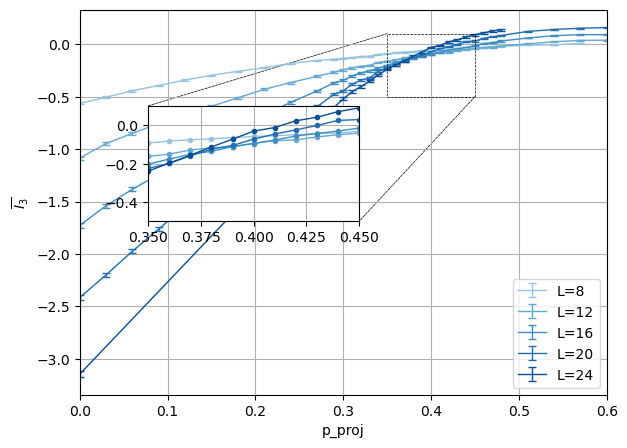

In [125]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=True,
xlim1=[.35,.45],
ylim1=[-.5,0.1],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.33},
yscale=None,
errorbar=True,
filename=None,
)

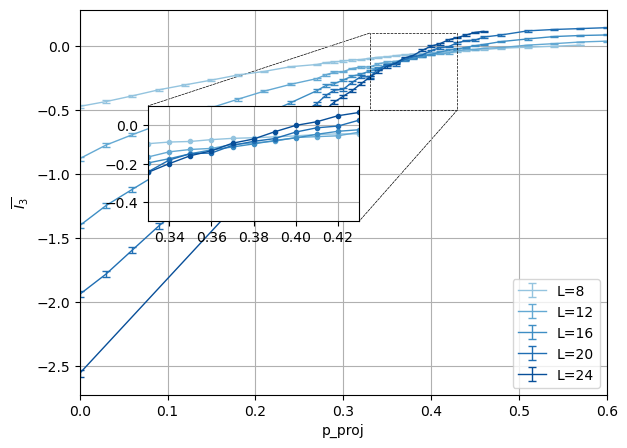

In [142]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=True,
xlim1=[.33,.43],
ylim1=[-.5,0.1],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.36},
yscale=None,
errorbar=True,
filename=None,
)

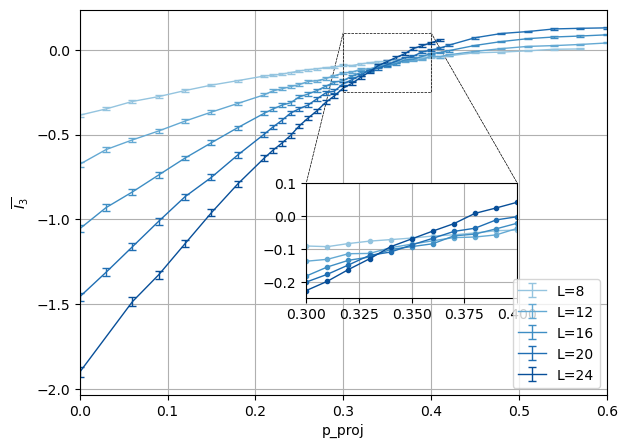

In [146]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=True,
xlim1=[.30,.40],
ylim1=[-.25,0.1],
ax_inset_pos1=[.43,.25,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.39},
yscale=None,
errorbar=True,
filename=None,
)

In [35]:
L=8
df_1_3.xs('TMI', level='Metrics').xs(L, level='L').xs(0.39,level='p_ctrl').map(np.mean)

,observations
p_proj,
0.0,-0.385821


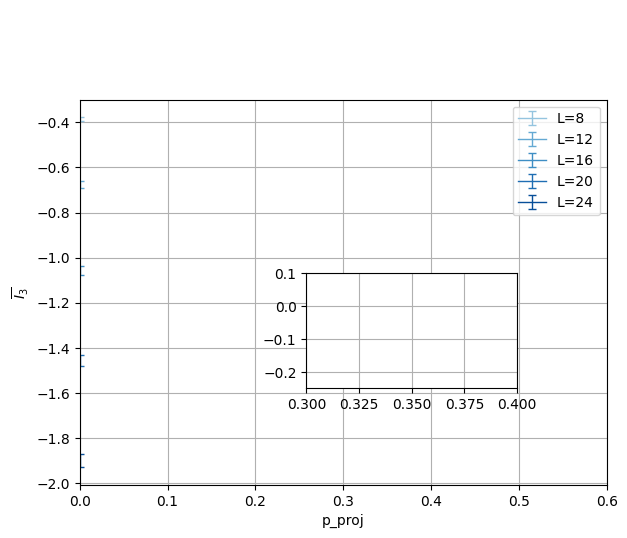

In [20]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=True,
xlim1=[.30,.40],
ylim1=[-.25,0.1],
ax_inset_pos1=[.43,.25,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.39},
yscale=None,
errorbar=True,
filename=None,
)

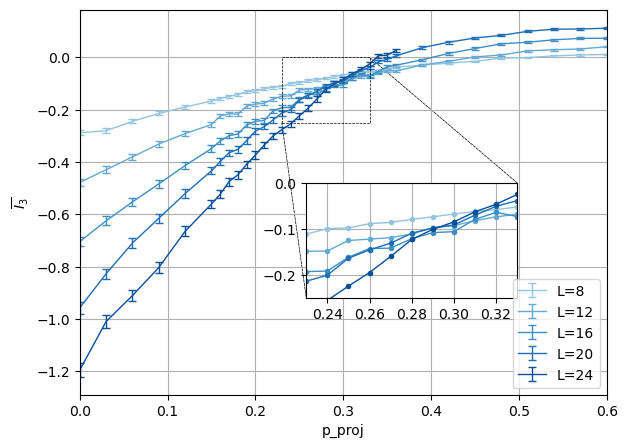

In [158]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=True,
xlim1=[.23,.33],
ylim1=[-.25,0.],
ax_inset_pos1=[.43,.25,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.42},
yscale=None,
errorbar=True,
filename=None,
)

# Data collapse individual

## O

In [90]:
dc_O_opt=optimal_df(names=['Metrics', 'p_proj', 'p_ctrl'])

In [12]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.0,p_c=0.488,)

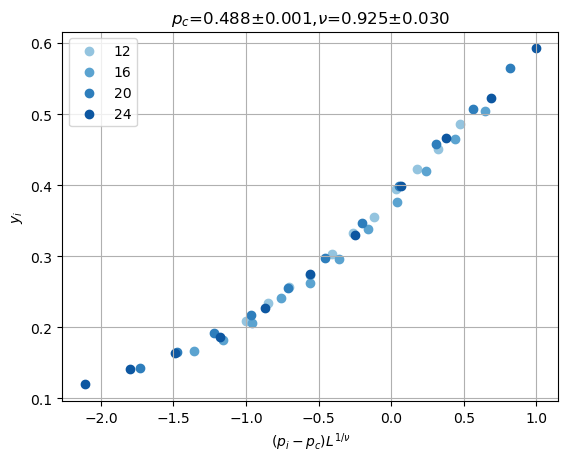

In [92]:
dc.plot_data_collapse()

In [93]:
dc_O_opt.add_optimal(dc)

In [94]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.03},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.0,p_c=0.499,)

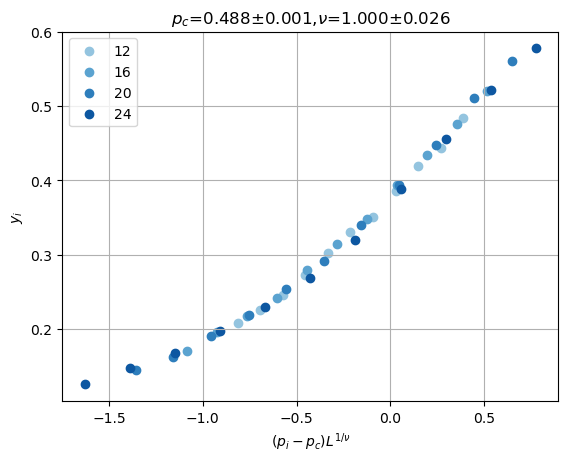

In [95]:
dc.plot_data_collapse()

In [96]:
dc_O_opt.add_optimal(dc)

In [97]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.06},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.,p_c=0.484,)

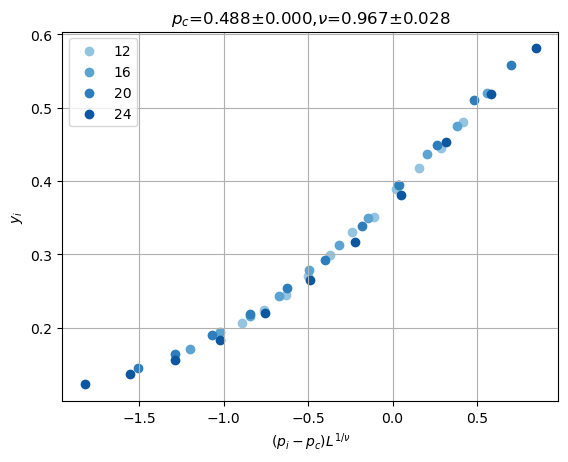

In [98]:
dc.plot_data_collapse()

In [99]:
dc_O_opt.add_optimal(dc)

In [100]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.09},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

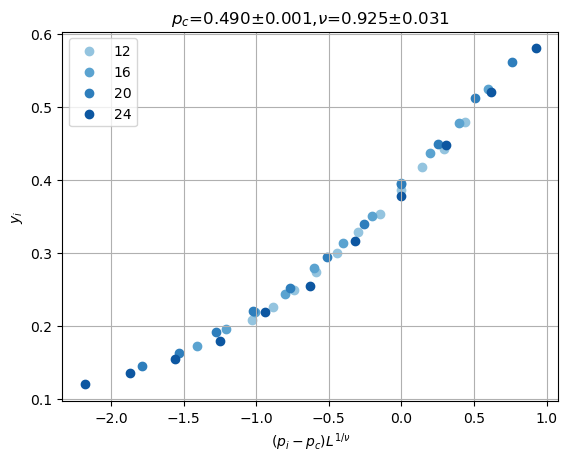

In [101]:
dc.plot_data_collapse()

In [102]:
dc_O_opt.add_optimal(dc)

In [103]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.12},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

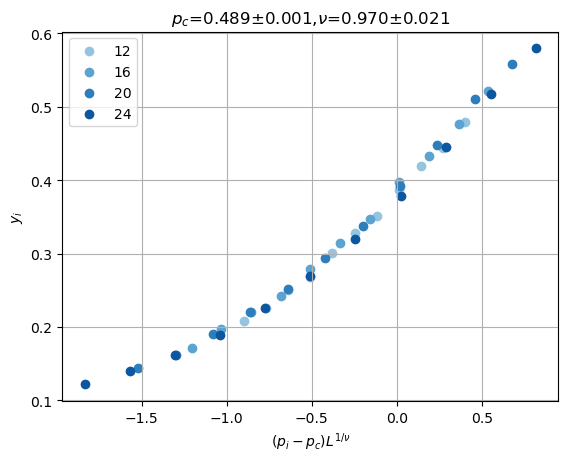

In [104]:
dc.plot_data_collapse()

In [105]:
dc_O_opt.add_optimal(dc)

In [106]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.15},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

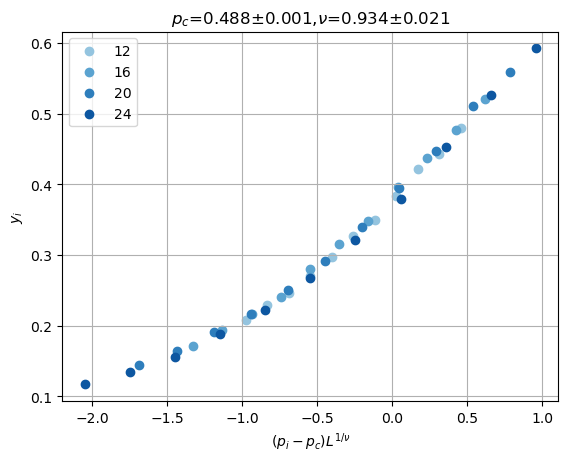

In [107]:
dc.plot_data_collapse()

In [108]:
dc_O_opt.add_optimal(dc)

In [109]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.18},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

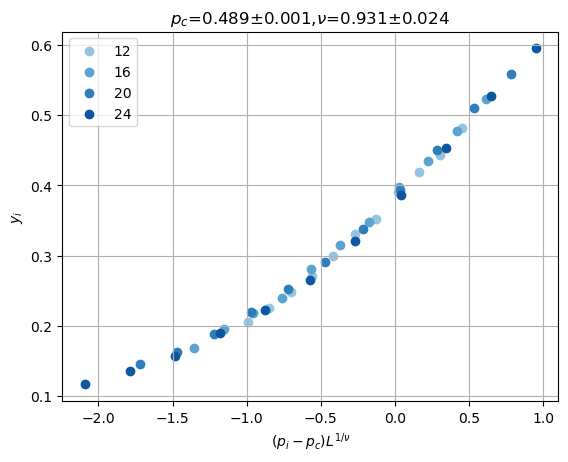

In [110]:
dc.plot_data_collapse()

In [111]:
dc_O_opt.add_optimal(dc)

In [112]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.21},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

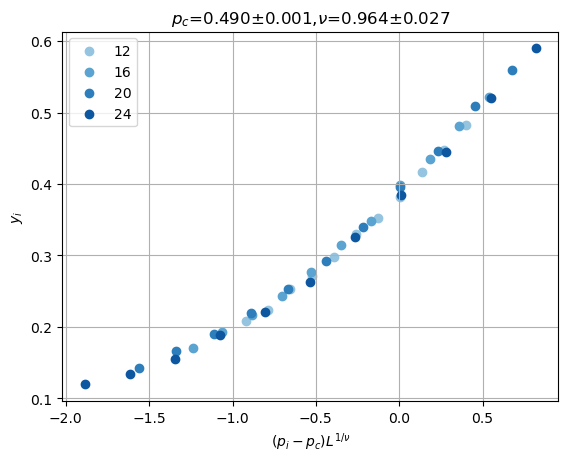

In [113]:
dc.plot_data_collapse()

In [114]:
dc_O_opt.add_optimal(dc)

In [115]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.24},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

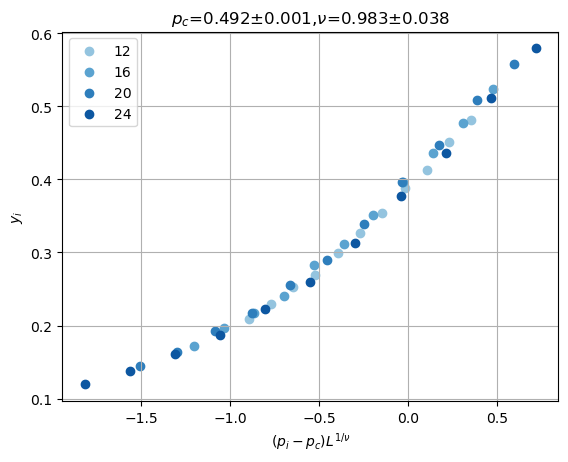

In [116]:
dc.plot_data_collapse()

In [117]:
dc_O_opt.add_optimal(dc)

In [118]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.27},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

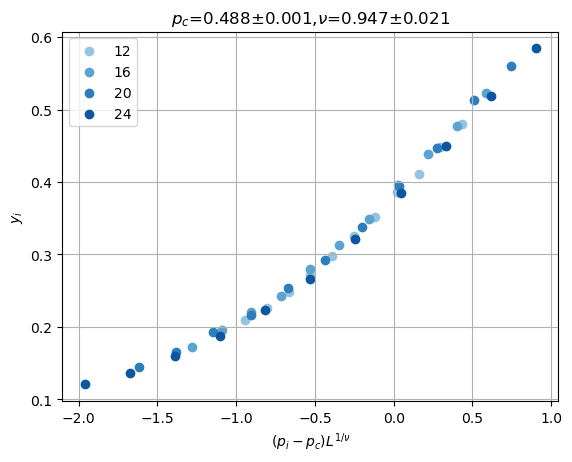

In [119]:
dc.plot_data_collapse()

In [120]:
dc_O_opt.add_optimal(dc)

In [121]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.30},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

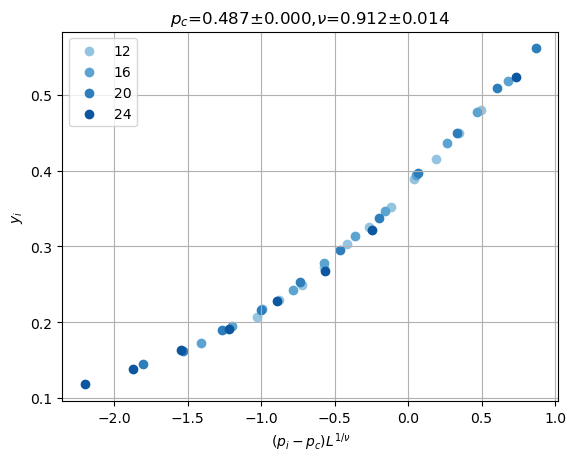

In [122]:
dc.plot_data_collapse()

In [123]:
dc_O_opt.add_optimal(dc)

In [124]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.33},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.0,p_c=0.4871,)

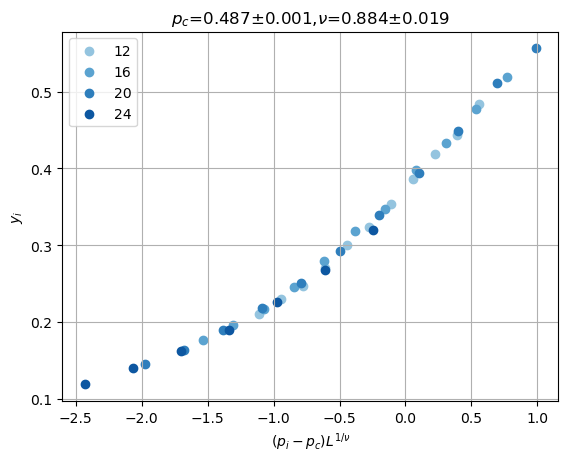

In [125]:
dc.plot_data_collapse()

In [126]:
dc_O_opt.add_optimal(dc)

In [127]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.36},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

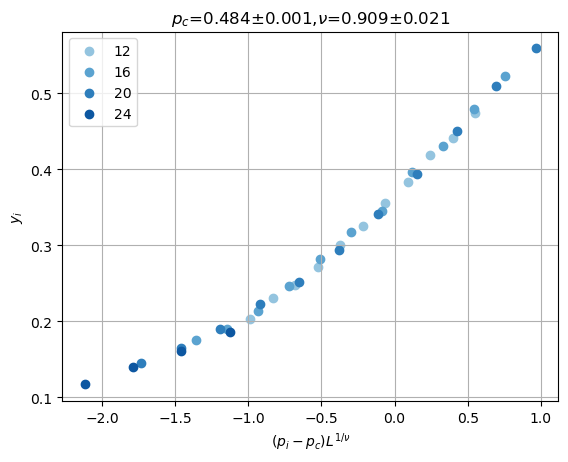

In [128]:
dc.plot_data_collapse()

In [129]:
dc_O_opt.add_optimal(dc)

In [130]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.39},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

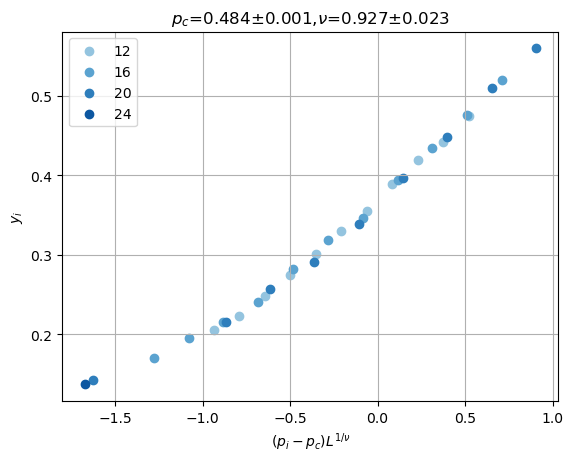

In [131]:
dc.plot_data_collapse()

In [132]:
dc_O_opt.add_optimal(dc)

In [133]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.42},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

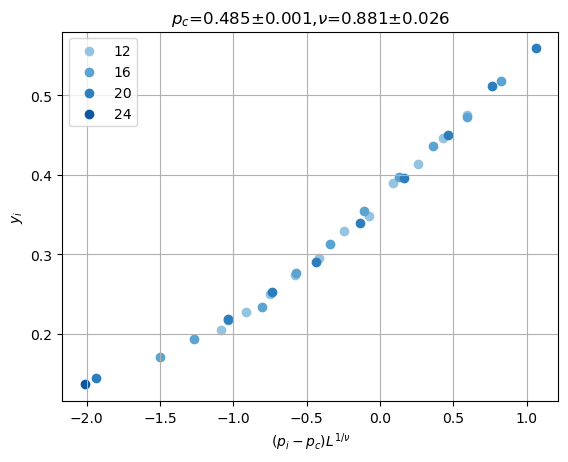

In [134]:
dc.plot_data_collapse()

In [135]:
dc_O_opt.add_optimal(dc)

In [136]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.45},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

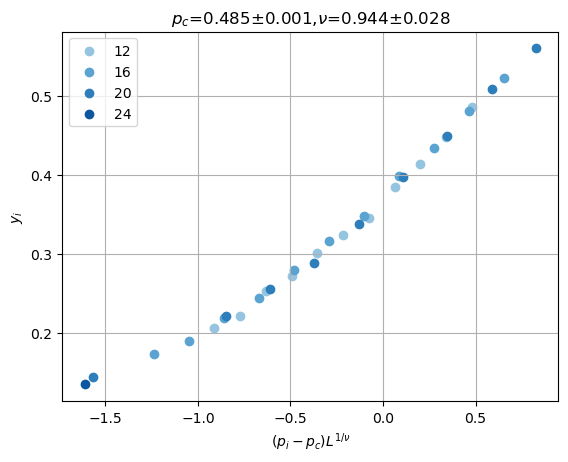

In [137]:
dc.plot_data_collapse()

In [138]:
dc_O_opt.add_optimal(dc)

In [139]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.48},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

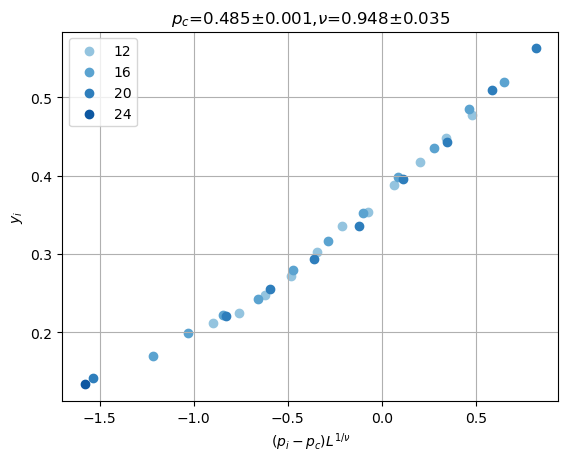

In [140]:
dc.plot_data_collapse()

In [141]:
dc_O_opt.add_optimal(dc)

In [142]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.51},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

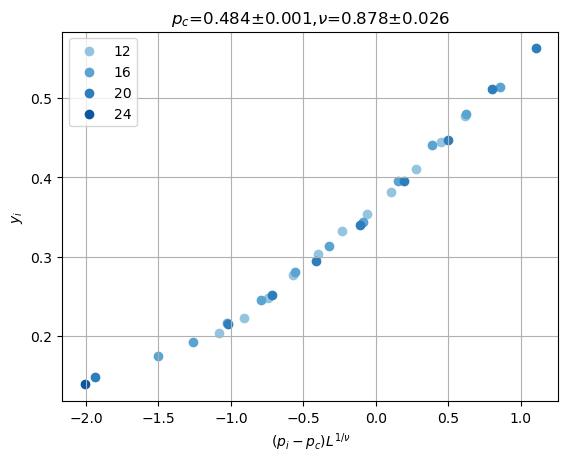

In [143]:
dc.plot_data_collapse()

In [144]:
dc_O_opt.add_optimal(dc)

In [145]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.54},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

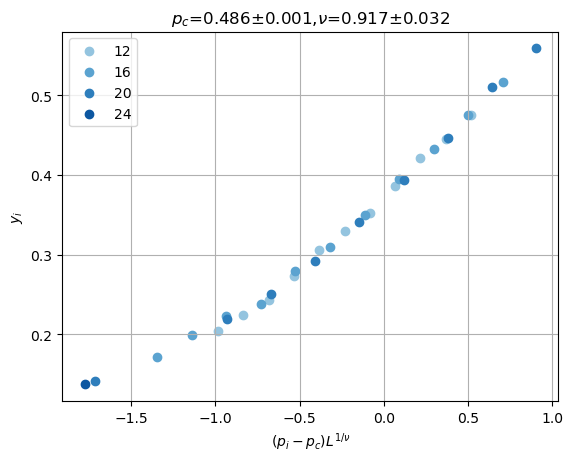

In [146]:
dc.plot_data_collapse()

In [147]:
dc_O_opt.add_optimal(dc)

In [148]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.57},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

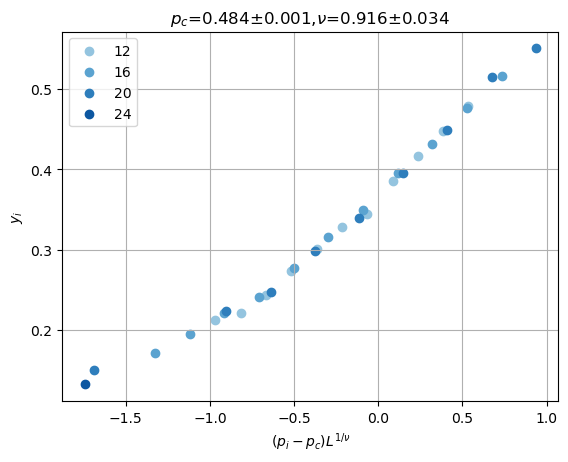

In [149]:
dc.plot_data_collapse()

In [150]:
dc_O_opt.add_optimal(dc)

In [151]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'O','p_proj':0.60},Lmin=10,Lmax=24,p_range=[0.42,0.52],p_dim=2)
dc.datacollapse(nu=1.1,p_c=0.491,)

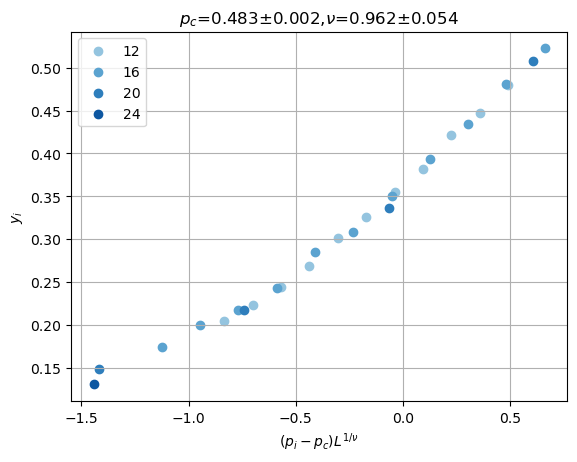

In [152]:
dc.plot_data_collapse()

In [153]:
dc_O_opt.add_optimal(dc)

In [154]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)

## TMI

### TMI mean (ent)

##### $p_{proj}$=0.00

In [1]:
dc_TMI_opt=optimal_df(names=['Metrics', 'p_proj', 'p_ctrl'])

NameError: name 'optimal_df' is not defined

In [12]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0},Lmin=12,Lmax=24,p_range=[0.4,0.6],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.,p_c=0.501,)
# dc.datacollapse(nu=1.,p_c=.498,)

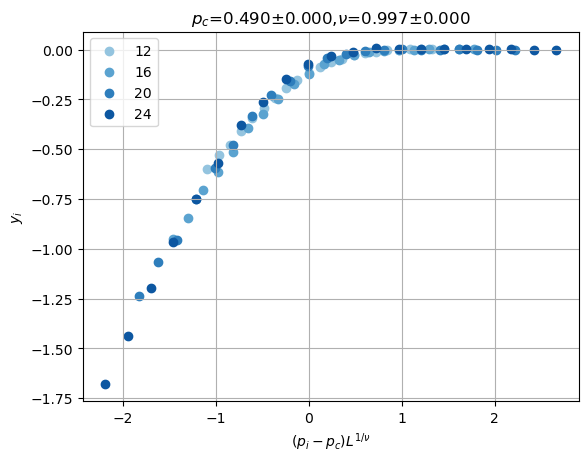

In [18]:
dc.plot_data_collapse()

In [380]:
dc_TMI_opt.add_optimal(dc)

In [19]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.03},Lmin=12,Lmax=24,p_range=[0.4,0.56],p_='p_ctrl',L_='L')
dc.datacollapse(nu=1.,p_c=0.501,)

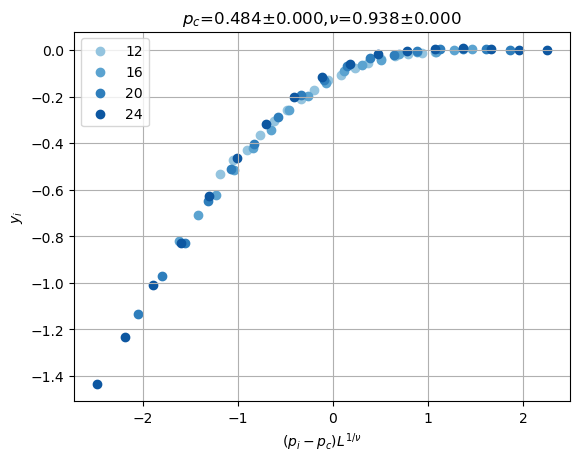

In [20]:
dc.plot_data_collapse()

In [383]:
dc_TMI_opt.add_optimal(dc)

In [384]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.06},Lmin=12,Lmax=24,p_range=[0.4,0.56],p_dim=2)
dc.datacollapse(nu=1.,p_c=0.501,)

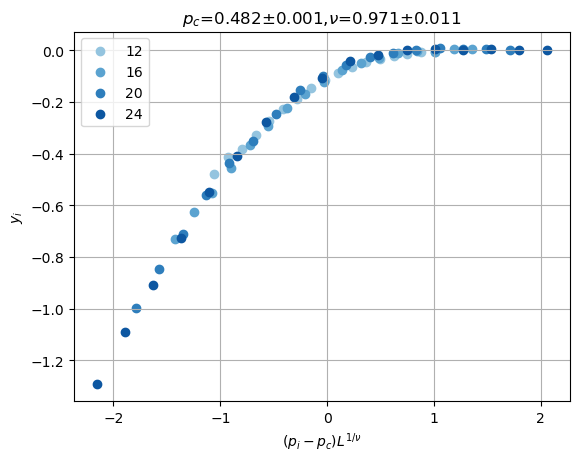

In [385]:
dc.plot_data_collapse()

In [386]:
dc_TMI_opt.add_optimal(dc)

##### $p_{proj}$=0.09

In [387]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.09},Lmin=12,Lmax=24,p_range=[0.38,0.54],p_dim=2)
dc.datacollapse(nu=1.,p_c=0.491,)

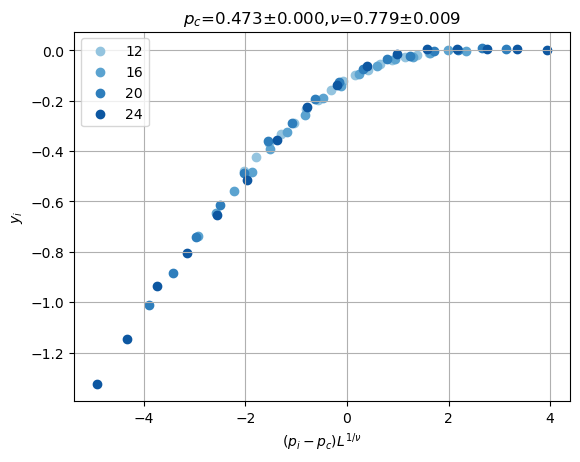

In [388]:
dc.plot_data_collapse()

In [389]:
dc_TMI_opt.add_optimal(dc)

##### $p_{proj}$=0.12

In [390]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.12},Lmin=12,Lmax=24,p_range=[0.39,0.53],p_dim=2)
# dc.datacollapse(nu=0.75,p_c=0.461,)
dc.datacollapse(nu=1.,p_c=0.491,)

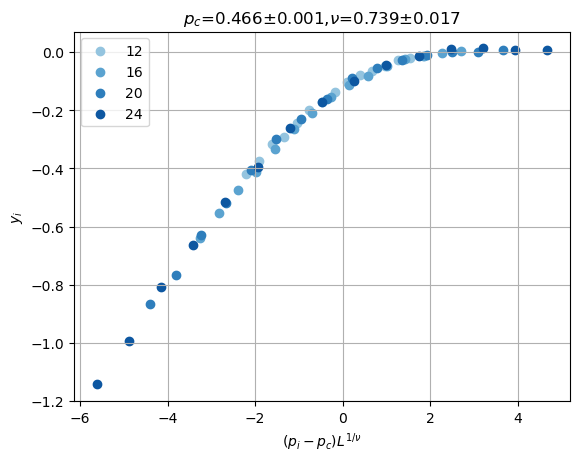

In [391]:
dc.plot_data_collapse()

In [392]:
dc_TMI_opt.add_optimal(dc)

##### $p_{proj}$=0.15

In [393]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.15},Lmin=12,Lmax=24,p_range=[0.39,0.53],p_dim=2)
# dc.datacollapse(nu=0.75,p_c=0.461,)
dc.datacollapse(nu=1.,p_c=0.501,)


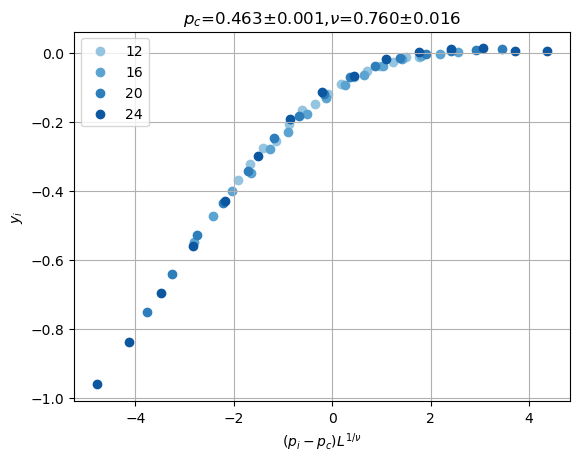

In [394]:
dc.plot_data_collapse()

In [395]:
dc_TMI_opt.add_optimal(dc)

##### $p_{proj}$=0.18

In [396]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.18},Lmin=12,Lmax=24,p_range=[0.37,0.52],p_dim=2)
# dc.datacollapse(nu=1.0,p_c=0.441,)
dc.datacollapse(nu=1.,p_c=0.471,)


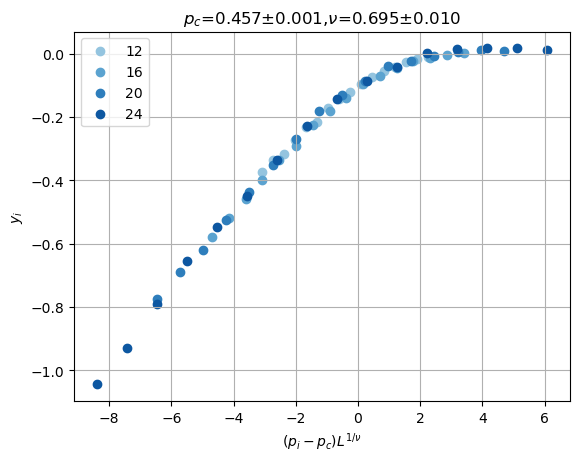

In [397]:
dc.plot_data_collapse()

In [398]:
dc_TMI_opt.add_optimal(dc)

##### $p_{proj}$=0.21

In [399]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.21},Lmin=12,Lmax=24,p_range=[0.38,0.52],p_dim=2)
dc.datacollapse(nu=0.75,p_c=0.441,)

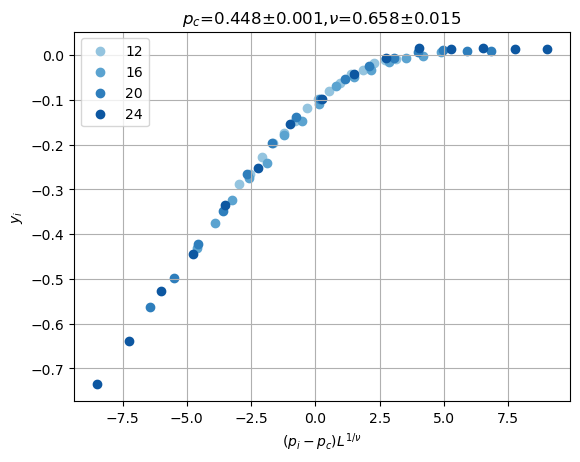

In [400]:
dc.plot_data_collapse()

In [401]:
dc_TMI_opt.add_optimal(dc)

##### $p_{proj}$=0.24

In [402]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.24},Lmin=12,Lmax=24,p_range=[0.36,0.52],p_dim=2)
dc.datacollapse(nu=0.75,p_c=0.431,)

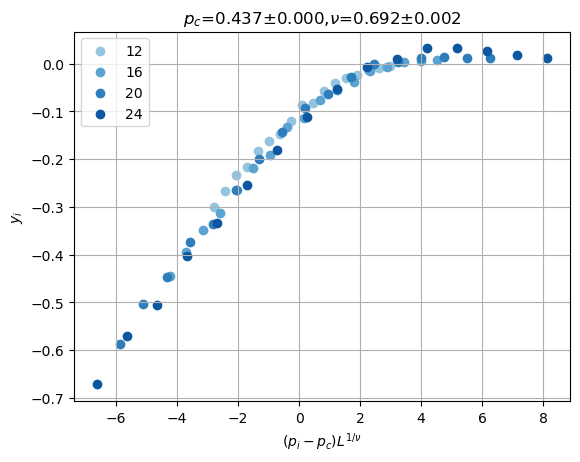

In [403]:
dc.plot_data_collapse()

In [404]:
dc_TMI_opt.add_optimal(dc)

##### $p_{proj}$=0.27

In [405]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.27},Lmin=12,Lmax=24,p_range=[0.35,0.49],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.431,)

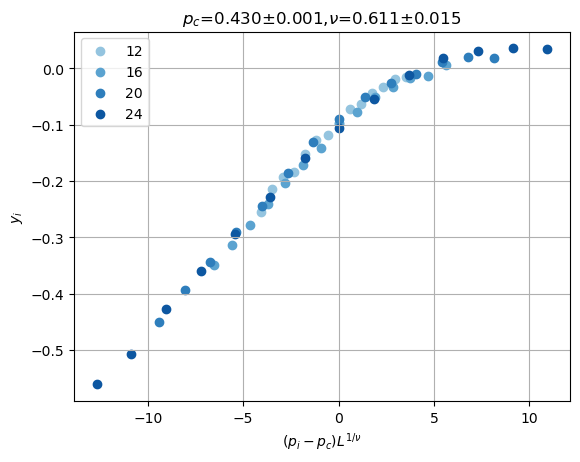

In [406]:
dc.plot_data_collapse()

In [407]:
dc_TMI_opt.add_optimal(dc)

##### $p_{proj}$=0.30

In [408]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.30},Lmin=12,Lmax=24,p_range=[0.35,0.47],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.411,)

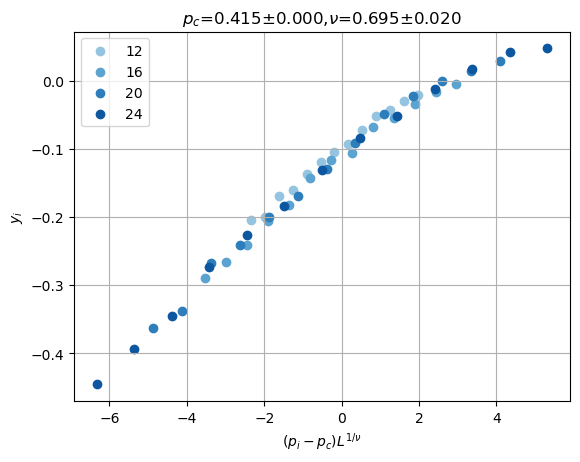

In [409]:
dc.plot_data_collapse()

In [410]:
dc_TMI_opt.add_optimal(dc)

In [411]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.33},Lmin=12,Lmax=24,p_range=[0.33,0.47],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.401,)

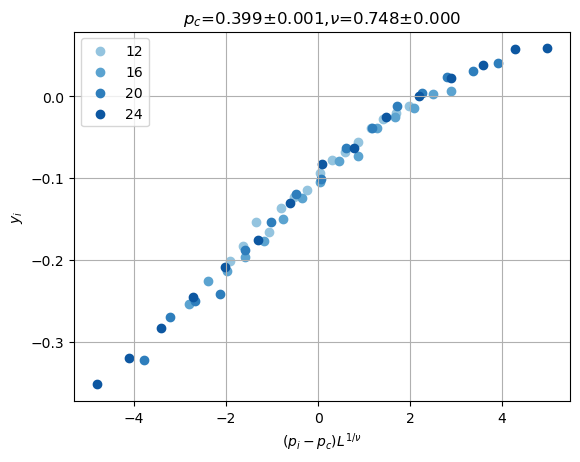

In [412]:
dc.plot_data_collapse()

In [413]:
dc_TMI_opt.add_optimal(dc)

##### $p_{proj}$=0.36

In [414]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.36},Lmin=12,Lmax=24,p_range=[0.29,0.43],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.371,)

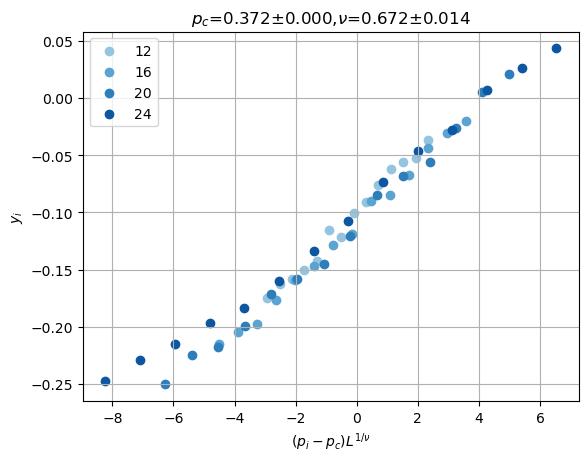

In [415]:
dc.plot_data_collapse()

In [416]:
dc_TMI_opt.add_optimal(dc)

### TMI p_proj

##### $p_{ctrl}$=0.0

In [417]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.0},Lmin=16,Lmax=24,p_range=[0.10,0.3],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.201,)

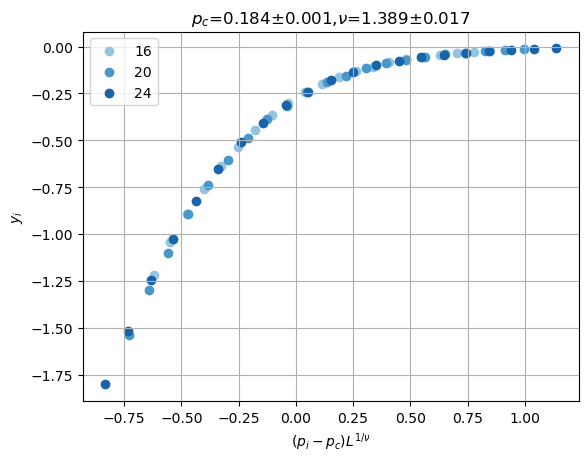

In [418]:
dc.plot_data_collapse()

In [419]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.03

In [420]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.03},Lmin=16,Lmax=24,p_range=[0.17,0.37],p_dim=2)
dc.datacollapse(nu=0.75,p_c=0.265,)

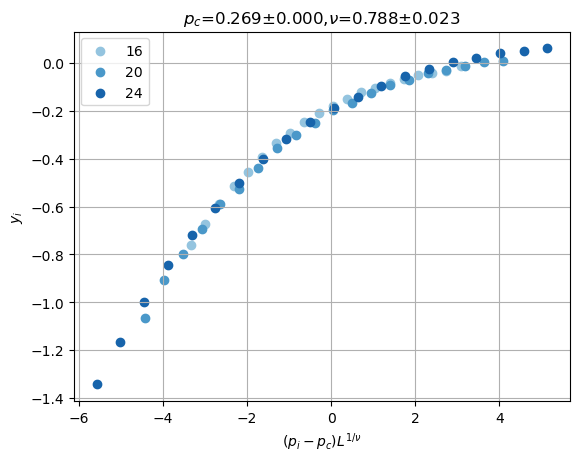

In [421]:
dc.plot_data_collapse()

In [422]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.06

In [423]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.06},Lmin=16,Lmax=24,p_range=[0.2,0.4],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.301,)

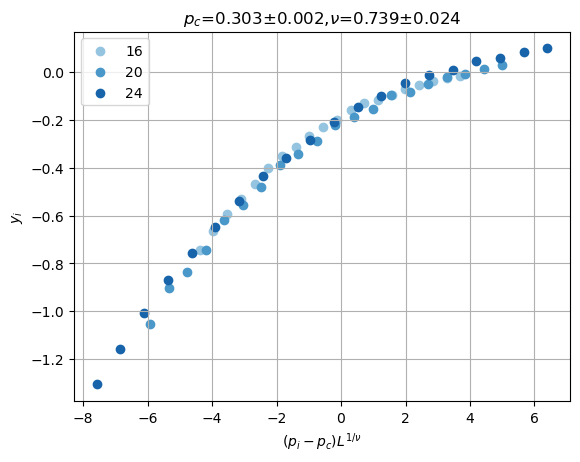

In [424]:
dc.plot_data_collapse()

In [425]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.09

In [426]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.09},Lmin=16,Lmax=24,p_range=[0.23,0.43],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.331,)

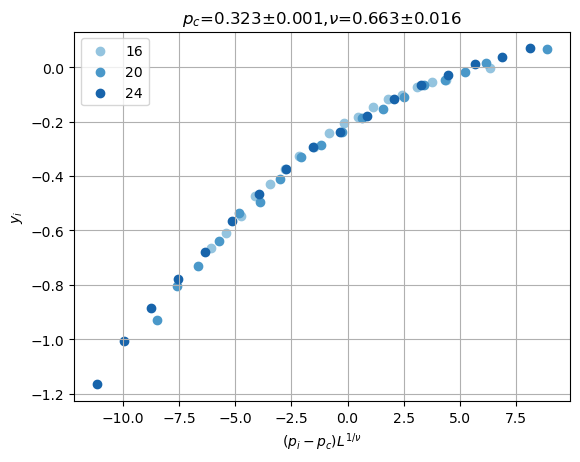

In [427]:
dc.plot_data_collapse()

In [428]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.12

In [429]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.12},Lmin=16,Lmax=24,p_range=[0.28,0.40],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.351,)

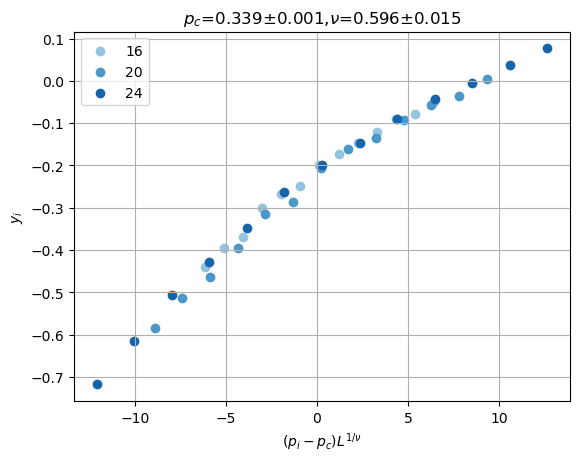

In [430]:
dc.plot_data_collapse()

In [431]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.15

In [432]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.15},Lmin=16,Lmax=24,p_range=[0.26,0.46],p_dim=2)
dc.datacollapse(nu=0.7,p_c=0.361,)

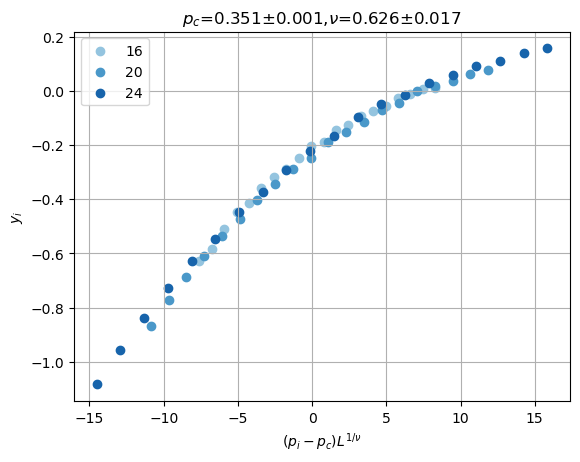

In [433]:
dc.plot_data_collapse()

In [434]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.18

In [435]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.18},Lmin=16,Lmax=24,p_range=[0.27,0.47],p_dim=2)
dc.datacollapse(nu=0.7,p_c=0.371,)

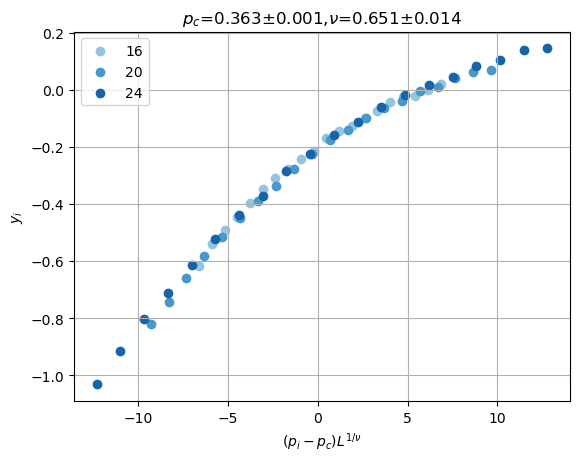

In [436]:
dc.plot_data_collapse()

In [437]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.21

In [438]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.21},Lmin=16,Lmax=24,p_range=[0.28,0.48],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.381,)

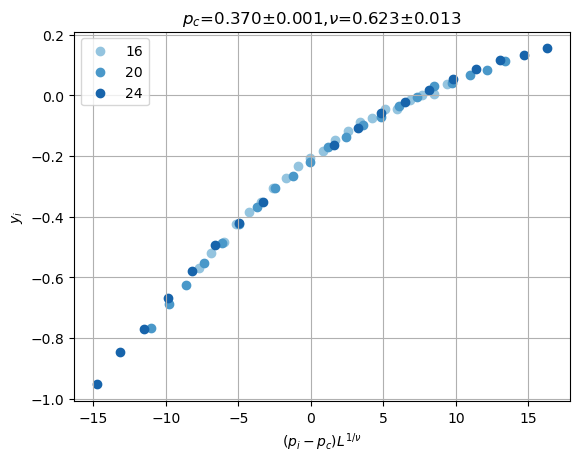

In [439]:
dc.plot_data_collapse()

In [440]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.24

In [441]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.24},Lmin=16,Lmax=24,p_range=[0.29,0.49],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.391,)

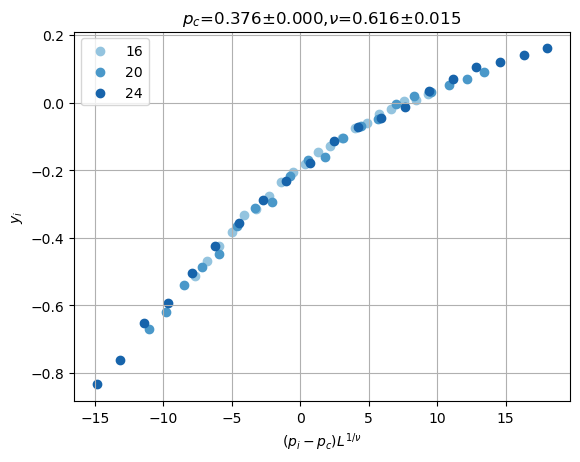

In [442]:
dc.plot_data_collapse()

In [443]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.27

In [444]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.27},Lmin=16,Lmax=24,p_range=[0.29,0.49],p_dim=2)
dc.datacollapse(nu=0.7,p_c=0.371,)

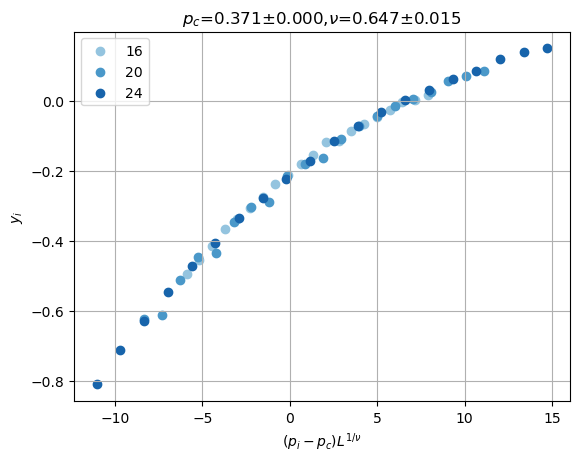

In [445]:
dc.plot_data_collapse()

In [446]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.3

In [447]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.3},Lmin=16,Lmax=24,p_range=[0.29,0.49],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.368,)

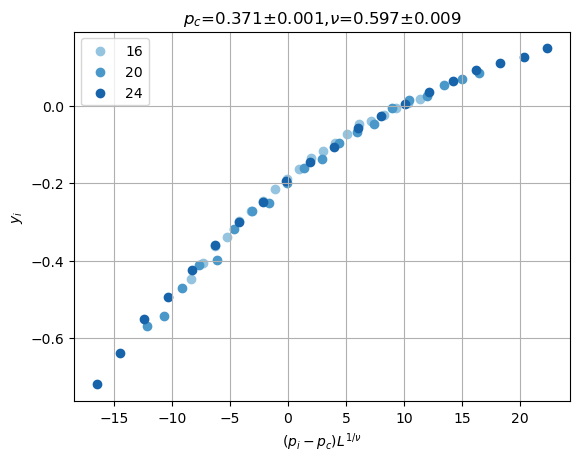

In [448]:
dc.plot_data_collapse()

In [449]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.33

In [450]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.33},Lmin=16,Lmax=24,p_range=[0.29,0.49],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.365,)

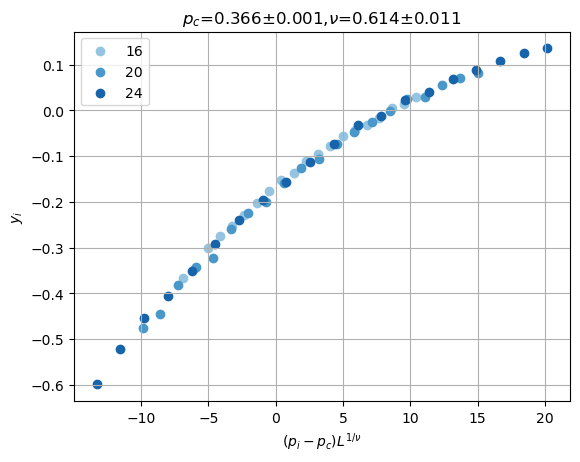

In [451]:
dc.plot_data_collapse()

In [452]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.36

In [453]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.36},Lmin=16,Lmax=24,p_range=[0.27,0.47],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.356,)

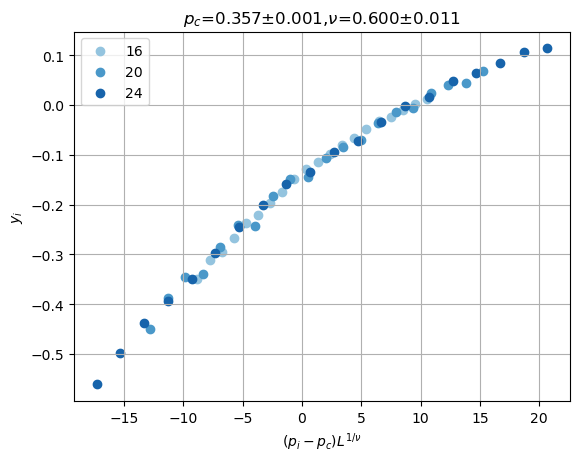

In [454]:
dc.plot_data_collapse()

In [455]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.39

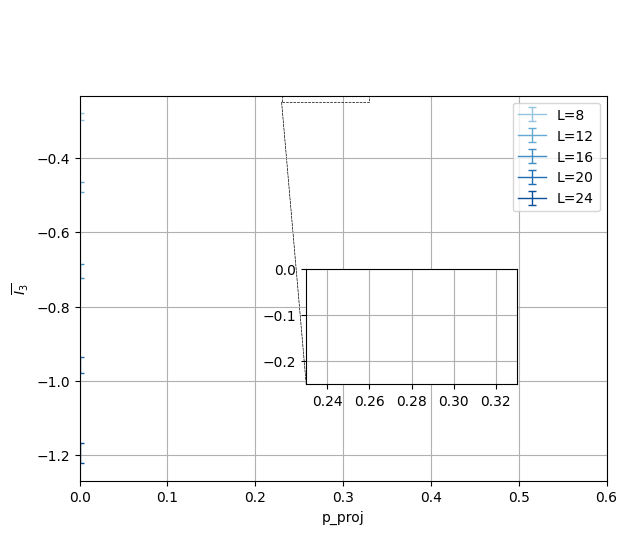

In [19]:
plot_line_inset(df=df_1_3,
L_list=np.arange(8,26,4),inset1=True,
xlim1=[.23,.33],
ylim1=[-.25,0.],
ax_inset_pos1=[.43,.25,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.42},
yscale=None,
errorbar=True,
filename=None,
)

In [456]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.39},Lmin=16,Lmax=24,p_range=[0.21,0.41],p_dim=2)
dc.datacollapse(nu=.75,p_c=0.321,)

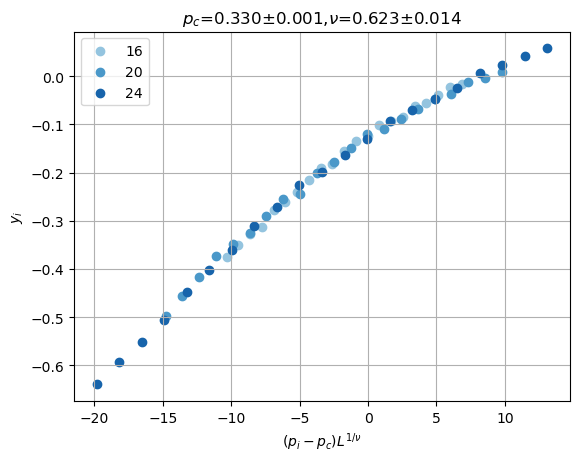

In [457]:
dc.plot_data_collapse()

In [458]:
dc_TMI_opt.add_optimal(dc)

##### $p_{ctrl}$=0.42

In [459]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.42},Lmin=16,Lmax=24,p_range=[0.16,0.36],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.284,)

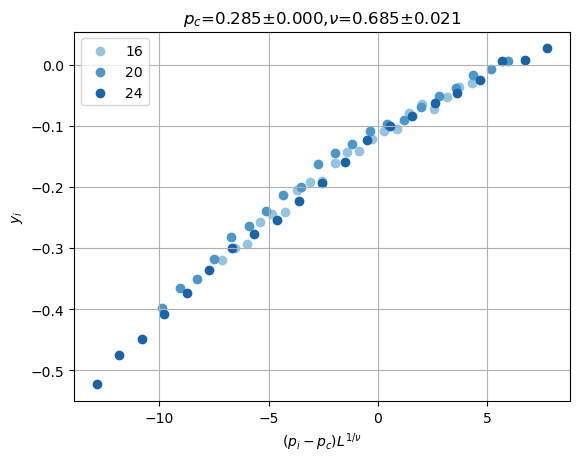

In [460]:
dc.plot_data_collapse()

In [461]:
dc_TMI_opt.add_optimal(dc)

In [462]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)

# Save

In [463]:
with open('datacollapse_1_3.pickle','wb') as f:
    pickle.dump([dc_O_opt.opt_df,dc_TMI_opt.opt_df],f)

In [464]:
dc_TMI_opt.opt_df

p_c     p_c_error        nu      nu_error     y  \
Metrics p_proj p_ctrl                                                         
TMI     0.00   NaN     0.490166  7.742700e-08  0.997602  1.461057e-04  None   
        0.03   NaN     0.483817  4.045721e-04  0.938175  2.765023e-07  None   
        0.06   NaN     0.481819  6.968900e-04  0.971259  1.126196e-02  None   
        0.09   NaN     0.473294  4.533754e-04  0.778906  8.530174e-03  None   
        0.12   NaN     0.466437  8.507049e-04  0.739346  1.745363e-02  None   
        0.15   NaN     0.463143  5.223175e-04  0.760006  1.617161e-02  None   
        0.18   NaN     0.456977  5.210302e-04  0.695320  1.036425e-02  None   
        0.21   NaN     0.447964  6.922672e-04  0.657986  1.522520e-02  None   
        0.24   NaN     0.437411  4.957709e-04  0.692329  2.369638e-03  None   
        0.27   NaN     0.429755  5.613402e-04  0.610810  1.483695e-02  None   
        0.30   NaN     0.415228  3.305344e-07  0.694571  1.981642e-02  None   
        0.33   NaN     0.398773  5.517270e-04  0.748092  1.222604e-06  None   
        0.36   NaN     0.372448  3.640825e-07  0.671628  1.403866e-02  None   
        NaN    0.00    0.184469  6.874063e-04  1.389192  1.726306e-02  None   
               0.03    0.268909  4.293966e-06  0.787895  2.278699e-02  None   
               0.06    0.303007  1.589290e-03  0.739271  2.401250e-02  None   
               0.09    0.322744  1.100088e-03  0.663196  1.585340e-02  None   
               0.12    0.338634  8.619948e-04  0.596369  1.493937e-02  None   
               0.15    0.350817  1.198902e-03  0.626261  1.737791e-02  None   
               0.18    0.363189  1.021482e-03  0.650741  1.443410e-02  None   
               0.21    0.370297  1.026966e-03  0.623392  1.275226e-02  None   
               0.24    0.375848  3.670438e-07  0.616390  1.523210e-02  None   
               0.27    0.371465  2.202311e-06  0.647207  1.499218e-02  None   
               0.30    0.370687  6.303398e-04  0.597346  8.761729e-03  None   
               0.33    0.365516  8.678356e-04  0.614476  1.129298e-02  None   
               0.36    0.356518  8.220548e-04  0.599794  1.054681e-02  None   
               0.39    0.330427  1.153152e-03  0.622560  1.427910e-02  None   
               0.42    0.284791  3.604741e-06  0.685459  2.050798e-02  None   

                      y_error  
Metrics p_proj p_ctrl          
TMI     0.00   NaN       None  
        0.03   NaN       None  
        0.06   NaN       None  
        0.09   NaN       None  
        0.12   NaN       None  
        0.15   NaN       None  
        0.18   NaN       None  
        0.21   NaN       None  
        0.24   NaN       None  
        0.27   NaN       None  
        0.30   NaN       None  
        0.33   NaN       None  
        0.36   NaN       None  
        NaN    0.00      None  
               0.03      None  
               0.06      None  
               0.09      None  
               0.12      None  
               0.15      None  
               0.18      None  
               0.21      None  
               0.24      None  
               0.27      None  
               0.30      None  
               0.33      None  
               0.36      None  
               0.39      None  
               0.42      None

In [465]:
dc_O_opt.opt_df

p_c     p_c_error        nu  nu_error     y  \
Metrics p_proj p_ctrl                                                     
O       0.00   NaN     0.487922  8.205975e-04  0.924926  0.029657  None   
        0.03   NaN     0.487752  7.512375e-04  0.999511  0.026002  None   
        0.06   NaN     0.488219  3.118486e-08  0.967430  0.028451  None   
        0.09   NaN     0.490197  9.483248e-04  0.925054  0.031326  None   
        0.12   NaN     0.489172  5.631009e-04  0.969745  0.020597  None   
        0.15   NaN     0.488127  6.005569e-04  0.933602  0.021348  None   
        0.18   NaN     0.488762  7.474326e-04  0.930724  0.023550  None   
        0.21   NaN     0.489694  7.583895e-04  0.963737  0.027080  None   
        0.24   NaN     0.491731  1.035907e-03  0.983431  0.038248  None   
        0.27   NaN     0.488484  6.184194e-04  0.947427  0.021500  None   
        0.30   NaN     0.487434  4.134517e-04  0.912058  0.014073  None   
        0.33   NaN     0.486668  5.577660e-04  0.883739  0.019209  None   
        0.36   NaN     0.484205  7.042322e-04  0.909018  0.021311  None   
        0.39   NaN     0.484288  6.380829e-04  0.927305  0.022804  None   
        0.42   NaN     0.484533  7.835458e-04  0.880958  0.025555  None   
        0.45   NaN     0.485493  7.772745e-04  0.943695  0.028319  None   
        0.48   NaN     0.485270  9.560912e-04  0.948204  0.035035  None   
        0.51   NaN     0.483690  7.680773e-04  0.877693  0.025934  None   
        0.54   NaN     0.485525  9.264412e-04  0.917291  0.032306  None   
        0.57   NaN     0.484351  9.390867e-04  0.916495  0.034489  None   
        0.60   NaN     0.482988  1.622652e-03  0.962062  0.054058  None   

                      y_error  
Metrics p_proj p_ctrl          
O       0.00   NaN       None  
        0.03   NaN       None  
        0.06   NaN       None  
        0.09   NaN       None  
        0.12   NaN       None  
        0.15   NaN       None  
        0.18   NaN       None  
        0.21   NaN       None  
        0.24   NaN       None  
        0.27   NaN       None  
        0.30   NaN       None  
        0.33   NaN       None  
        0.36   NaN       None  
        0.39   NaN       None  
        0.42   NaN       None  
        0.45   NaN       None  
        0.48   NaN       None  
        0.51   NaN       None  
        0.54   NaN       None  
        0.57   NaN       None  
        0.60   NaN       None

100%|██████████| 27/27 [00:03<00:00,  8.18it/s]


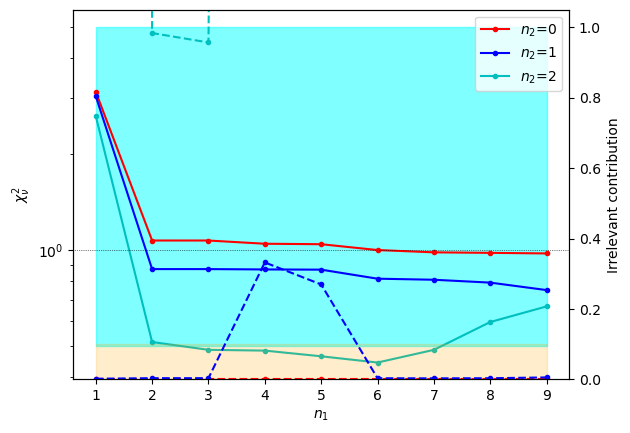

In [ ]:
model_1_3=grid_search(n1_list=np.arange(1,10),n2_list=np.arange(3),p_c=0.284,nu=0.71,y=4,verbose=False,df=df_1_3,params={'Metrics':'TMI','p_ctrl':0.42},Lmin=12,Lmax=24,p_range=[0.16,0.36],p_dim=2)
plot_chi2_ratio(model_1_3)

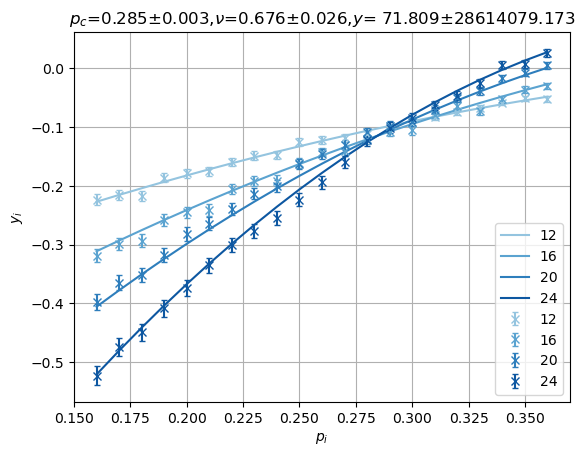

In [ ]:
model_1_3[2,1].plot_data_collapse(drift=True)  

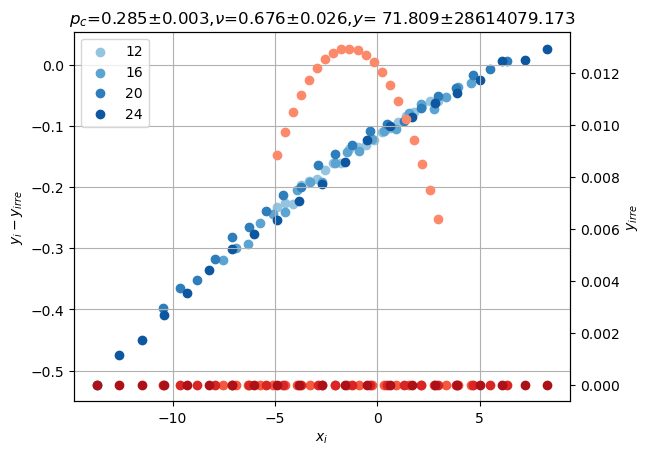

In [ ]:
model_1_3[2,1].plot_data_collapse(drift=True,driftcollapse=True)  

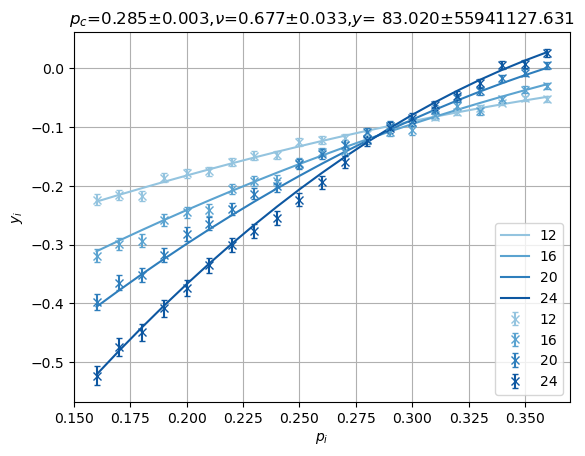

In [ ]:
model_1_3[3,1].plot_data_collapse(drift=True)  

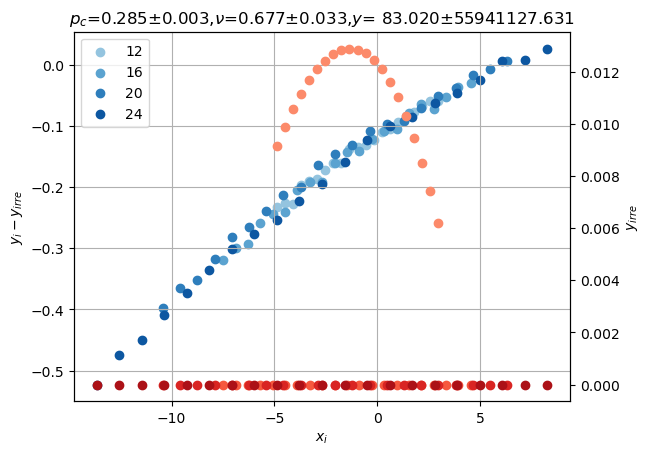

In [ ]:
model_1_3[3,1].plot_data_collapse(drift=True,driftcollapse=True)  

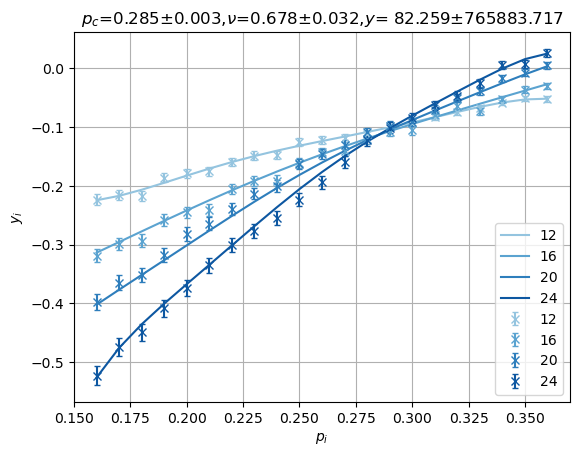

In [ ]:
model_1_3[6,1].plot_data_collapse(drift=True)  

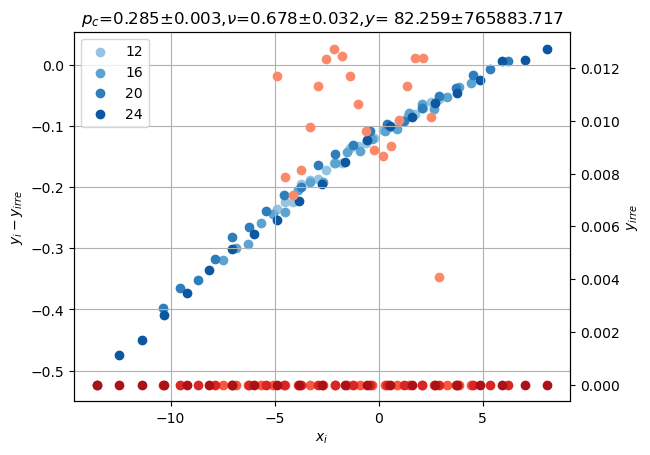

In [ ]:
model_1_3[6,1].plot_data_collapse(drift=True,driftcollapse=True)  

In [ ]:
plot_line_inset(df_1_3,p_proj=0.03,L_list=np.arange(8,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.47,0.51],ylim2=[.3,.5],ax_inset_pos2=[.1,.3,.4,.5],metrics='O',yscale=None,errorbar=True,filename='auto',xj='1-3')

NameError: name 'plot_SA_2' is not defined

## TMI one other fitting

### TMI mean (ent)

##### $p_{proj}$=0.00

In [ ]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.00},Lmin=12,Lmax=24,p_range=[0.4,0.56],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.471,)

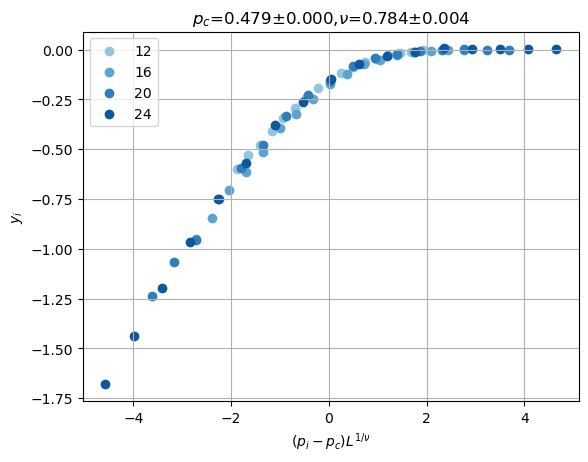

In [ ]:
dc.plot_data_collapse()

In [ ]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.03},Lmin=12,Lmax=24,p_range=[0.4,0.56],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.471,)


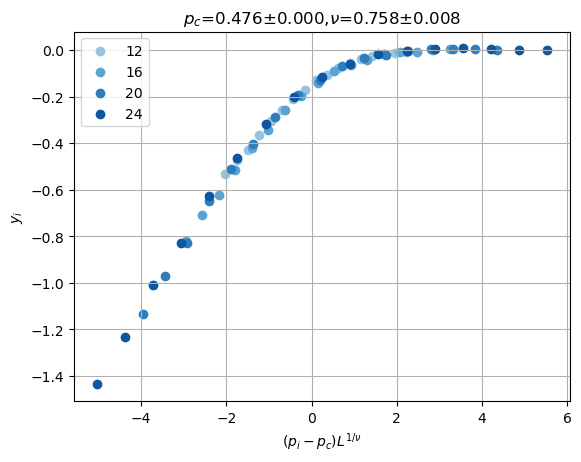

In [ ]:
dc.plot_data_collapse()

In [ ]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.06},Lmin=12,Lmax=24,p_range=[.4,0.56],p_dim=2)
dc.datacollapse(nu=0.7,p_c=0.473,)

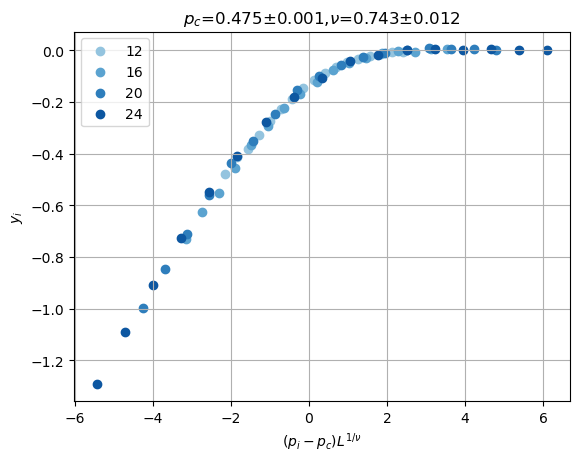

In [ ]:
dc.plot_data_collapse()

In [ ]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.09},Lmin=12,Lmax=24,p_range=[0.38,0.54],p_dim=2)
dc.datacollapse(nu=0.75,p_c=0.461,)

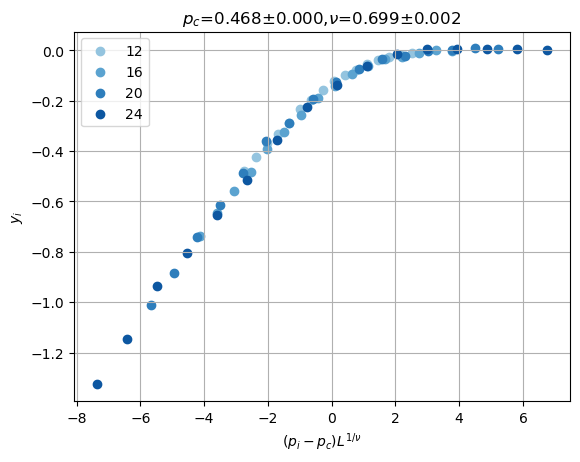

In [ ]:
dc.plot_data_collapse()

##### $p_{proj}$=0.12

In [ ]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.12},Lmin=12,Lmax=24,p_range=[0.39,0.53],p_dim=2)
dc.datacollapse(nu=0.75,p_c=0.461,)

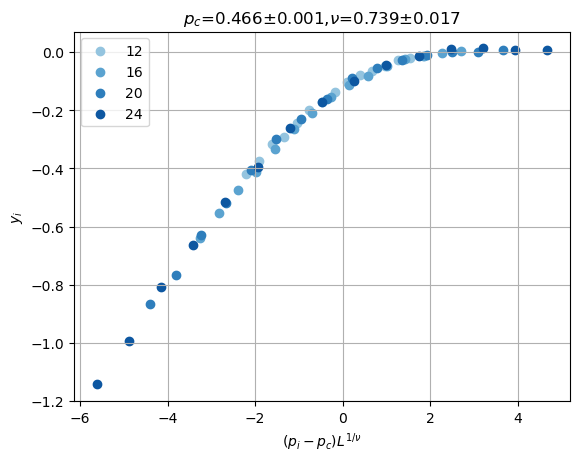

In [ ]:
dc.plot_data_collapse()

##### $p_{proj}$=0.15

In [ ]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.15},Lmin=12,Lmax=24,p_range=[0.39,0.53],p_dim=2)
dc.datacollapse(nu=0.75,p_c=0.461,)

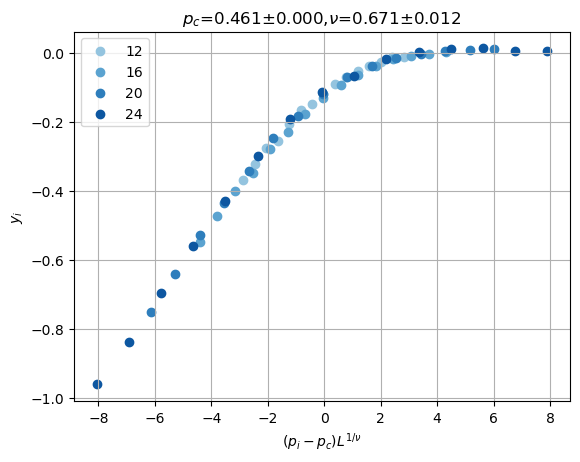

In [ ]:
dc.plot_data_collapse()

##### $p_{proj}$=0.18

In [ ]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.18},Lmin=12,Lmax=24,p_range=[0.37,0.52],p_dim=2)
dc.datacollapse(nu=0.7,p_c=0.441,)

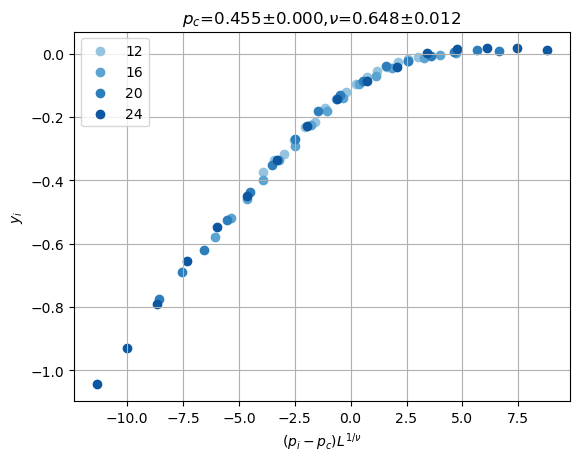

In [ ]:
dc.plot_data_collapse()

##### $p_{proj}$=0.21

In [ ]:
dc=DataCollapse(df=df_1_3,params={'Metrics':'TMI','p_proj':0.21},Lmin=12,Lmax=24,p_range=[0.38,0.52],p_dim=2)
dc.datacollapse(nu=0.75,p_c=0.441,)

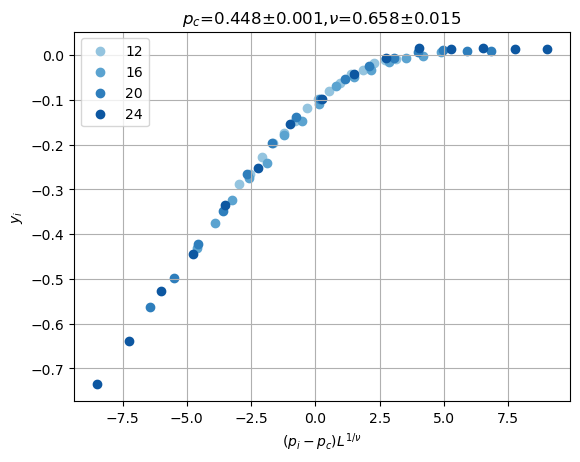

In [ ]:
dc.plot_data_collapse()

# Bootstrap

In [41]:
resampling=[bootstrapping(df_1_3,params={'Metrics':'TMI','p_proj':0},p_='p_ctrl',L_='L',p_range=[0.4,0.6],nu=1.0,p_c=.498,rng=idx) for idx in range(500)]

In [42]:
p_c_list=[r.res.params['p_c'].value for r in resampling]
nu_list=[r.res.params['nu'].value for r in resampling]

In [43]:
np.mean(p_c_list),np.mean(nu_list)

(0.4973181641212704, 1.0340985141063666)

In [44]:
np.std(p_c_list),np.std(nu_list)

(0.001329471525923159, 0.026172509782115945)

(array([  2.,   1.,  11.,  16.,  33.,  59., 165., 151.,  57.,   5.]),
 array([0.90766827, 0.92692956, 0.94619085, 0.96545214, 0.98471343,
        1.00397472, 1.02323601, 1.0424973 , 1.06175858, 1.08101987,
        1.10028116]),
 <BarContainer object of 10 artists>)

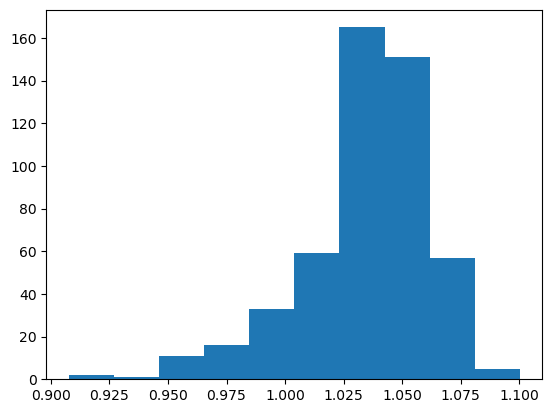

In [45]:
plt.hist(nu_list)

In [21]:
resampling=[bootstrapping(df_1_3,params={'Metrics':'TMI','p_proj':0},p_='p_ctrl',L_='L',p_range=[0.4,0.6],nu=.7,p_c=.481,rng=idx) for idx in range(100)]

In [22]:
p_c_list=[r.res.params['p_c'].value for r in resampling]
nu_list=[r.res.params['nu'].value for r in resampling]

In [23]:
np.mean(p_c_list),np.mean(nu_list)

(0.4822338210026566, 0.7371585658869222)

In [24]:
np.std(p_c_list),np.std(nu_list)

(0.0007970018932243716, 0.02650416542861161)

(array([19., 22., 31., 12., 13.,  2.,  0.,  0.,  0.,  1.]),
 array([0.48097446, 0.48149913, 0.48202379, 0.48254845, 0.48307311,
        0.48359777, 0.48412243, 0.48464709, 0.48517175, 0.48569641,
        0.48622107]),
 <BarContainer object of 10 artists>)

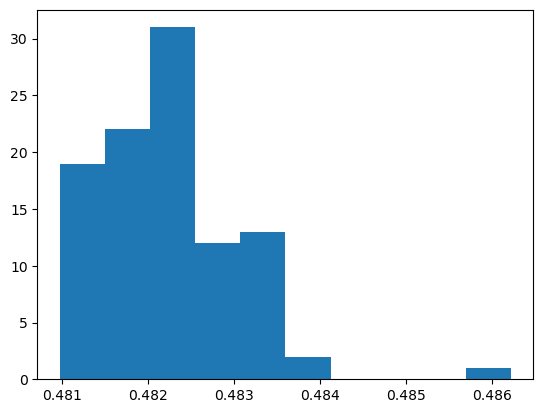

In [26]:
plt.hist(p_c_list)

(array([15.,  9., 21., 23., 13.,  1.,  3.,  7.,  5.,  3.]),
 array([0.69860353, 0.70924418, 0.71988482, 0.73052547, 0.74116611,
        0.75180676, 0.7624474 , 0.77308805, 0.78372869, 0.79436934,
        0.80500998]),
 <BarContainer object of 10 artists>)

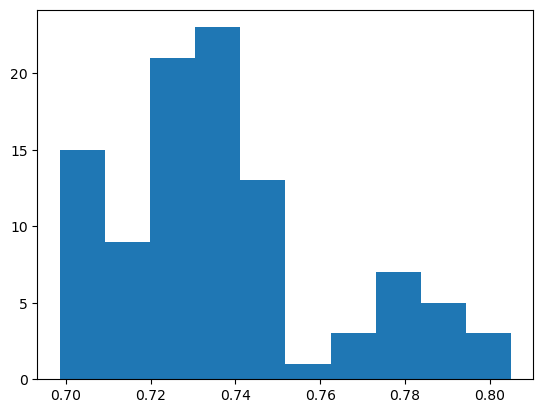

In [25]:
plt.hist(nu_list)

In [ ]:
np.mean(p_c_list),np.mean(nu_list)

(0.4972277923113398, 1.0332038765582858)

In [ ]:
np.std(p_c_list),np.std(nu_list)

(0.0014033921704190034, 0.02366291896926977)

(array([ 3.,  1.,  1.,  3.,  7.,  5., 23., 22., 21., 14.]),
 array([0.95412686, 0.96543615, 0.97674544, 0.98805472, 0.99936401,
        1.01067329, 1.02198258, 1.03329186, 1.04460115, 1.05591043,
        1.06721972]),
 <BarContainer object of 10 artists>)

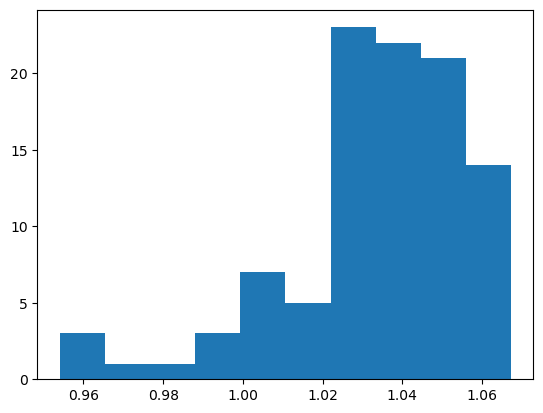

In [ ]:
plt.hist(nu_list)